In [1]:
#Importing required libraries and reading the dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [2]:
#Checking for missing values
df['gender'].isnull().sum()
df['race/ethnicity'].isnull().sum()
df['test preparation course'].isnull().sum()
df['test preparation course'].isnull().sum()
df['lunch'].isnull().sum()
df['math score'].isnull().sum()
df['reading score'].isnull().sum()
df['writing score'].isnull().sum()

0

In [3]:
#Renaming columns for ease in understanding
df = df.rename(columns = {'race/ethnicity': 'race', 'parental level of education': 'parent_education', 'test preparation course': 'test_performance', 'math score' : 'math_score', 'reading score' : 'reading_score', 'writing score' : 'writing_score'})
df

,gender,race,parent_education,lunch,test_performance,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
#Replacing 'some college' with 'college'
#Replacing 'none' with 'unprepared' and 'completed' with 'prepared'
df['parent_education'] = df['parent_education'].replace('some college', 'college')
df['parent_education'] = df['parent_education'].replace('some high school', 'high school')
df['test_performance'] = df['test_performance'].replace('none', 'unprepared')
df['test_performance'] = df['test_performance'].replace('completed', 'prepared')
df

,gender,race,parent_education,lunch,test_performance,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,unprepared,72,72,74
1,female,group C,college,standard,prepared,69,90,88
2,female,group B,master's degree,standard,unprepared,90,95,93
3,male,group A,associate's degree,free/reduced,unprepared,47,57,44
4,male,group C,college,standard,unprepared,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,prepared,88,99,95
996,male,group C,high school,free/reduced,unprepared,62,55,55
997,female,group C,high school,free/reduced,prepared,59,71,65
998,female,group D,college,standard,prepared,68,78,77


In [5]:
#Checking for and omitting duplicate rows
print('Number of duplicate rows:')
print(df.duplicated().sum())
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df

Number of duplicate rows:
0


,gender,race,parent_education,lunch,test_performance,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,unprepared,72,72,74
1,female,group C,college,standard,prepared,69,90,88
2,female,group B,master's degree,standard,unprepared,90,95,93
3,male,group A,associate's degree,free/reduced,unprepared,47,57,44
4,male,group C,college,standard,unprepared,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,prepared,88,99,95
996,male,group C,high school,free/reduced,unprepared,62,55,55
997,female,group C,high school,free/reduced,prepared,59,71,65
998,female,group D,college,standard,prepared,68,78,77


In [6]:
#Mapping test_performance with binary labels
#Prepared - 1 and unprepared - 0
df['test_performance'] = df['test_performance'].map({'prepared': 1, 'unprepared': 0})
df

,gender,race,parent_education,lunch,test_performance,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,0,72,72,74
1,female,group C,college,standard,1,69,90,88
2,female,group B,master's degree,standard,0,90,95,93
3,male,group A,associate's degree,free/reduced,0,47,57,44
4,male,group C,college,standard,0,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,1,88,99,95
996,male,group C,high school,free/reduced,0,62,55,55
997,female,group C,high school,free/reduced,1,59,71,65
998,female,group D,college,standard,1,68,78,77


In [7]:
#Feature Selection - selecting all features at 1st
F = df[['gender', 'race', 'parent_education', 'lunch', 'math_score', 'reading_score', 'writing_score']]
C = df['test_performance']

In [8]:
#Data splitting - spliting data into test and train sets
F_encoded = pd.get_dummies(F)
F_train, F_test, C_train, C_test = train_test_split(F_encoded, C, test_size=0.2, random_state=40)
print("Training set shape - Features:", F_train.shape, "Target:", C_train.shape)
print("Testing set shape - Features:", F_test.shape, "Target:", C_test.shape)
print("Encoded Features:")
print(F)
print("\nTarget Variable:")
print(C)

Training set shape - Features: (800, 17) Target: (800,)
Testing set shape - Features: (200, 17) Target: (200,)
Encoded Features:
     gender     race    parent_education         lunch  math_score  \
0    female  group B   bachelor's degree      standard          72   
1    female  group C             college      standard          69   
2    female  group B     master's degree      standard          90   
3      male  group A  associate's degree  free/reduced          47   
4      male  group C             college      standard          76   
..      ...      ...                 ...           ...         ...   
995  female  group E     master's degree      standard          88   
996    male  group C         high school  free/reduced          62   
997  female  group C         high school  free/reduced          59   
998  female  group D             college      standard          68   
999  female  group D             college  free/reduced          77   

     reading_score  writing_sc

In [9]:
#Checking Accuracy of various algorithms (Naive Baye's, Logistic Regression, Random Forest, Decision Tree)
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
}
def train_and_evaluate_models(models, F_train, F_test, C_train, C_test):
    results = {}
    for name, model in models.items():
        model.fit(F_train, C_train)
        C_pred = model.predict(F_test)
        accuracy = accuracy_score(C_test, C_pred)
        results[name] = accuracy
    
    return results
model_accuracies = train_and_evaluate_models(models, F_train, F_test, C_train, C_test)
for name, accuracy in model_accuracies.items():
    print(f'Accuracy for {name}: {accuracy}')

Accuracy for Naive Bayes: 0.62
Accuracy for Logistic Regression: 0.73
Accuracy for Random Forest: 0.65
Accuracy for Decision Tree: 0.6


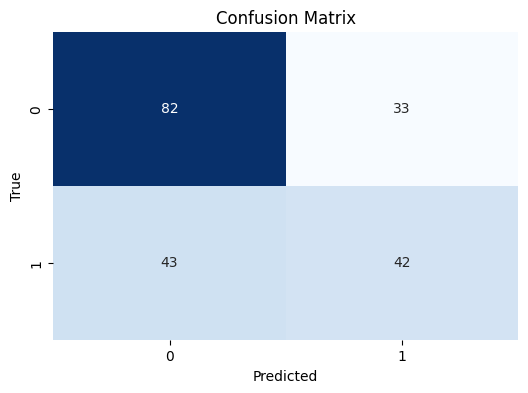

In [10]:
#Naive Baye's Classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(F_train, C_train)
C_pred = naive_bayes_model.predict(F_test)
cm = confusion_matrix(C_test, C_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

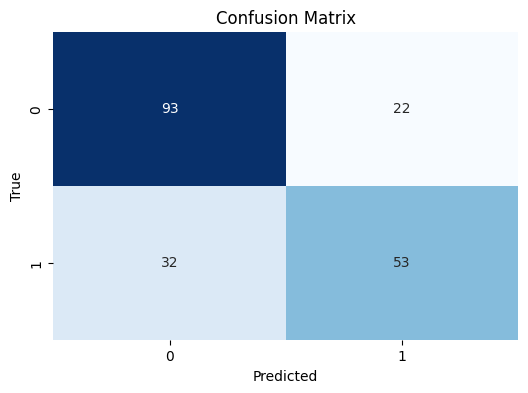

In [11]:
#Logistic Regression Classifier
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(F_train, C_train)
C_pred = logistic_regression_model.predict(F_test)
cm = confusion_matrix(C_test, C_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

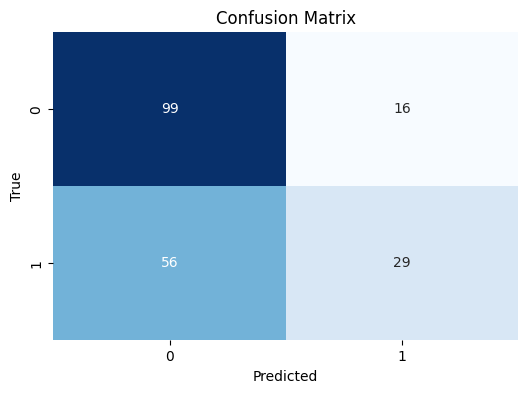

In [12]:
#Random Forest Classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(F_train, C_train)
C_pred = random_forest_model.predict(F_test)
cm = confusion_matrix(C_test, C_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

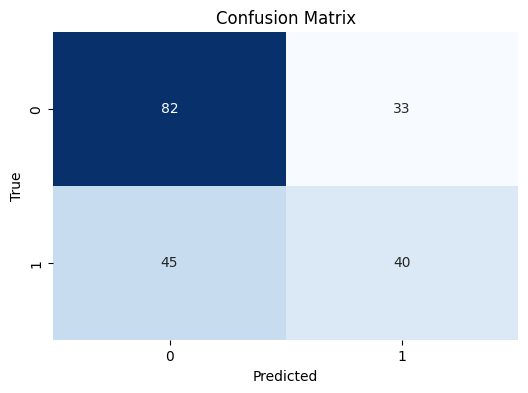

In [13]:
#Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(F_train, C_train)
C_pred = decision_tree_model.predict(F_test)
cm = confusion_matrix(C_test, C_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()